In [95]:
# Import and install necessary packages.
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [97]:
install("Bio")

In [98]:
from Bio import SeqIO
from Bio import Entrez
import pylab

In [99]:
Entrez.email = "nathaniel.davis@tufts.edu"

In [88]:
# Query the nuccore database for the records in question.
handle = Entrez.esearch(db="nuccore", term="Human adenovirus A AND Human adenovirus A[Organism]", retmax=500)
record = Entrez.read(handle)

In [89]:
# Fetch the records in a structured format.
handle = Entrez.efetch(db="nuccore", id=record["IdList"], rettype="gb", retmode="text")

In [90]:
# Generate and array of sequence lengths, one for each record.
sizes = [len(rec) for rec in SeqIO.parse(handle, "genbank")]

In [91]:
# Sort the sequence length array.
sizes.sort()

### Outlier Analysis

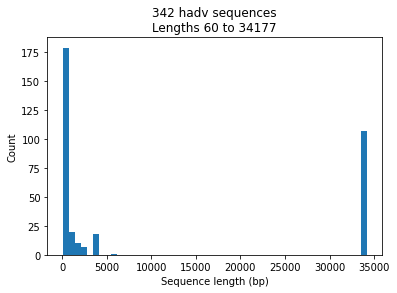

In [92]:
pylab.hist(sizes, bins=50)
pylab.title(
    "%i hadv sequences\nLengths %i to %i" % (len(sizes), min(sizes), max(sizes))
)
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
pylab.show()

The distribution of sequence lengths appears to be bimodal, with approximately 88% of observations falling in the ranges [60, 1000] (57%) and [33533, 34177] (31%). Additionally, no observations fall in the range (5641, 33533).

If we separate the values less than or equal to 5641 from those greater than or equal to 33533, we can get a better sense of observations that deviate from each of the two unimodal distributions.

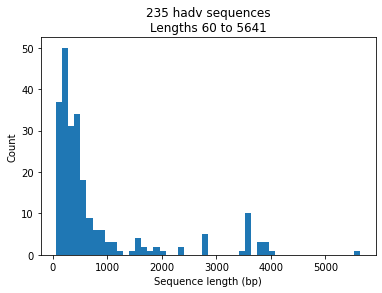

In [93]:
pylab.hist(sizes[:235], bins=50)
pylab.title(
    "%i hadv sequences\nLengths %i to %i" % (len(sizes[:235]), min(sizes[:235]), max(sizes[:235]))
)
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
pylab.show()

Based on the above histogram, sequences with length 2500 to 6000 base pairs appear to deviate from the dominant mode within this range.

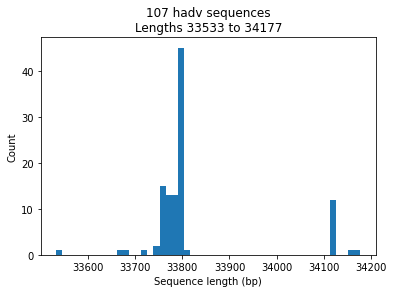

In [94]:
pylab.hist(sizes[235:], bins=50)
pylab.title(
    "%i hadv sequences\nLengths %i to %i" % (len(sizes[235:]), min(sizes[235:]), max(sizes[235:]))
)
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
pylab.show()

For sequences in our high range, those whose lengths fall above 34100 also appear to deviate from the main mode. One might also want to look at the one sequence with length < 33600 as another potential outlier.